# Price recommmendation - Polynomial Regression
## Chapter 7
### Predictive Analytics for the Modern Enterprise 

This is jupyter notebook that can be used to follow along the code examples for Chapter 7 Section 1 - Unsupervised learning of the book. The code examples go through some of the functionality that can be used to work with the sci-kit learn library in Python to work with unsupervised learning models. 

The notebook has been tested using the following pre-requisite:

Python V3.9.13 - https://www.python.org/
Anaconda Navigator V3 for Python 3.9 - https://www.anaconda.com/
Jupyter - V6.4.12 - https://jupyter.org/
Desktop computer - macOS Ventura V13.1

Documentation referece for Scikit Learn: https://scikit-learn.org/stable/

### Pre-requisites


You will need to install the scikit-learn package in your envionrment. 
In your environment run the following command

```bash
conda install -c conda-forge scikit-learn
```
OR
```bash
pip install -U scikit-learn
```

### Training and predicting with a Linear Regression Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#To perform model cross validation and scoring
from sklearn import model_selection, metrics
# The linear regression class in scikit learn supports polynomial regression
from sklearn.linear_model     import LinearRegression 
# To create testing and training splits of data
from sklearn.model_selection  import train_test_split 
#modeling scoring metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
#Preprocessing class to generate polynomail features
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
%matplotlib inline

The 'sale_price' dataset used in this example is synthetically generated and can be downloaded from the following resource: 

* Data used: https://github.com/paforme/predictiveanalytics/blob/main/Chapter7/Datasets/sale_price/prod2.csv

In [3]:
#Import sales data with temperature information
url = "./Datasets/sale_price/prod2.csv"
#Read the data from the URL in a Pandas dataframe
sales = pd.read_csv(url) 
predictors = ['price']
predicted = ['sales_quantity']

sales = sales.copy()
sales = sales[sales['item_code'] == 55]
sales

,day,price,sales_quantity,item_code
0,0,4.00,8202.0,55
1,1,4.01,7421.0,55
2,2,4.01,8706.0,55
3,3,4.02,6140.0,55
4,4,4.02,8614.0,55
...,...,...,...,...
175,175,5.45,4643.0,55
176,176,5.46,4522.0,55
177,177,5.48,4495.0,55
178,178,5.49,4765.0,55


In [4]:
#Polynomial Range
degree_min = 1
degree_max = 2 #change this to 5 to see the metrics for higher degree polynomails

# Train models with increasing polynomail degree and compare scoring metrics
for poly_d in range(degree_min,degree_max+1):
    poly_gen = PolynomialFeatures(degree=poly_d, include_bias=False) #Polynomail generator
    poly_features = poly_gen.fit_transform(sales[predictors]) #Generate polynomail features
    X_train, X_test, y_train, y_test = train_test_split(poly_features, sales[predicted], train_size=0.75, random_state=110) #create Test/Train split
    
    poly_reg_model = LinearRegression() #Define the model
    poly_reg_model.fit(X_train, y_train) #Fit the model
    poly_reg_y_predicted = poly_reg_model.predict(X_test) #predict based on test data
    
    r2 = r2_score(y_test, poly_reg_y_predicted) #R-squared score
    rmse = mean_squared_error(y_test, poly_reg_y_predicted, squared=False) #Root Mean Squared Error
    mae = mean_absolute_error(y_test, poly_reg_y_predicted) #Mean Absolute Error
    
    print("Degree: ", poly_d)
    print("R-Squared: ",r2 )
    print("RMSE: ",rmse) 
    print("MAE: ",mae, "\n") 

Degree:  1
R-Squared:  0.8851430150842248
RMSE:  497.8022250113161
MAE:  372.4902877873552 

Degree:  2
R-Squared:  0.9011934531197525
RMSE:  461.7118154505364
MAE:  343.95732555381886 



Text(0, 0.5, "['sales_quantity']")

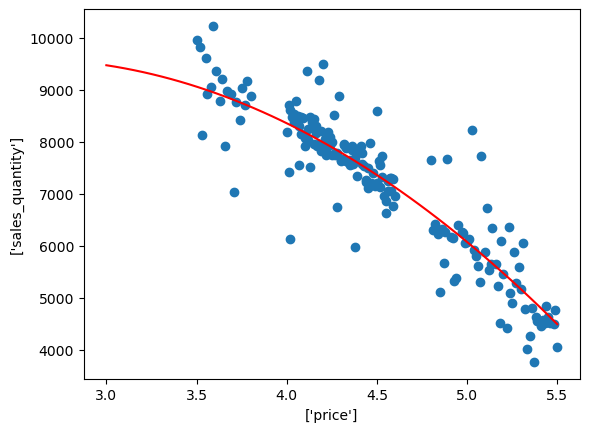

In [5]:
feature_range = np.linspace(3, 5.5) #Generate x features in range
poly_features = poly_gen.fit_transform(feature_range.reshape(-1,1)) #Generate polynomail features

y_predicted = poly_reg_model.predict(poly_features) #Make predictions on polynomial features
plt.scatter(sales[predictors], sales[predicted]) #Plot actual data
plt.plot(feature_range,y_predicted, c="red") #Plot predictions

plt.xlabel(predictors) 
plt.ylabel(predicted)

In [6]:
y_predicted = y_predicted.flatten() #Flatten the predicted values to a 1d array
total = feature_range*y_predicted #Multiply feature_range values with predicted sales_quantity (Total Sales = price * sales_quantity)
total

array([28430.43881992, 28826.67811791, 29210.56279135, 29581.62725587,
       29939.40592712, 30283.43322072, 30613.24355233, 30928.37133757,
       31228.35099208, 31512.71693151, 31781.00357149, 32032.74532765,
       32267.47661564, 32484.7318511 , 32684.04544966, 32864.95182695,
       33026.98539863, 33169.68058032, 33292.57178766, 33395.1934363 ,
       33477.07994186, 33537.76571999, 33576.78518633, 33593.67275651,
       33587.96284617, 33559.18987095, 33506.88824648, 33430.59238841,
       33329.83671237, 33204.15563401, 33053.08356895, 32876.15493284,
       32672.90414131, 32442.86561   , 32185.57375456, 31900.56299061,
       31587.3677338 , 31245.52239976, 30874.56140413, 30474.01916255,
       30043.43009066, 29582.3286041 , 29090.2491185 , 28566.7260495 ,
       28011.29381273, 27423.48682385, 26802.83949848, 26148.88625226,
       25461.16150084, 24739.19965984])

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


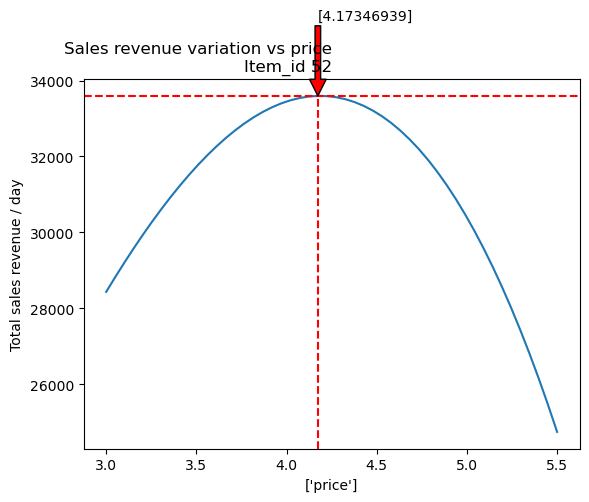

In [7]:
ymax = max(total) #Maximum value for total sales rales revenue
xpos = np.where(total == ymax) #Position of x(price) for Maximum value of total
xmax = feature_range[xpos] #Value of x(price) where total is maximized

fig = plt.figure()
ax = fig.add_subplot()
line = ax.plot(feature_range, total)#Plot total sales revenue vs item price

ax.annotate(xmax, xy=(xmax, ymax), xytext=(xmax, ymax + 2000), arrowprops=dict(facecolor='red'),) #Label the maximum point with the price value

ax.axvline(xmax, color='red', linestyle='dashed') #Vertical line for price
ax.axhline(ymax, color='red', linestyle='dashed') #Horizontal line for total sales revenue

plt.title("Sales revenue variation vs price\nItem_id 52", fontdict={'horizontalalignment': 'right'})
plt.xlabel(predictors) 
plt.ylabel('Total sales revenue / day')

plt.show()

In [8]:
print("Optimal selling price: ", xmax[0])
print("Maximum Daily sale: ", ymax)

Optimal selling price:  4.173469387755102
Maximum Daily sale:  33593.672756506225
